# LAPORAN UJI COBA PRAKTIKUM KECERDASAN KOMPUTASIONAL
#### Nama : Abdan Hafidz
#### NRP : 5054231021

## Import Library yang dibutuhkan

In [85]:
from utils import *
from logic import *
from notebook import psource

In [86]:
import agents as a

# Defining Symbolx
In my practice, i'll consider to use two boolean variables (P and Q) and define in as propotitional symbol with `symbols` syntax.

In [87]:
(P,Q) = symbols('P,Q')

# Propotitional Expression with Operand &, |, =>, <=>, ^

In [88]:
conjunction = P & Q
disjungtion = P | Q
implication = P |'==>'| Q
xor = P ^ Q
biimplication = P |'<==>'| Q

Parsing operator from each sentence / expression given

In [89]:
conjunction.op

'&'

In [90]:
conjunction.args

(P, Q)

In [91]:
disjungtion.op

'|'

In [92]:
disjungtion.args

(P, Q)

In [93]:
implication.op


'==>'

In [94]:
implication.args

(P, Q)

In [95]:
xor.op

'^'

In [96]:
xor.args

(P, Q)

In [97]:
biimplication.op

'<==>'

In [98]:
biimplication.args

(P, Q)

# Constructing Sentence
We can construct some propotitional sentence with `expr()` method

In [99]:
expr('~(P & Q)  ==>  (~P | ~Q)')

(~(P & Q) ==> (~P | ~Q))

# Propotitional Knowledge Base & Proof Resolution
We can add satisfying value for each value / statement that can conquered the evaluation result (True / False). 

For example we can create Ponnens & Tollens as Knowledge Base
*Modus Ponnens* <br>
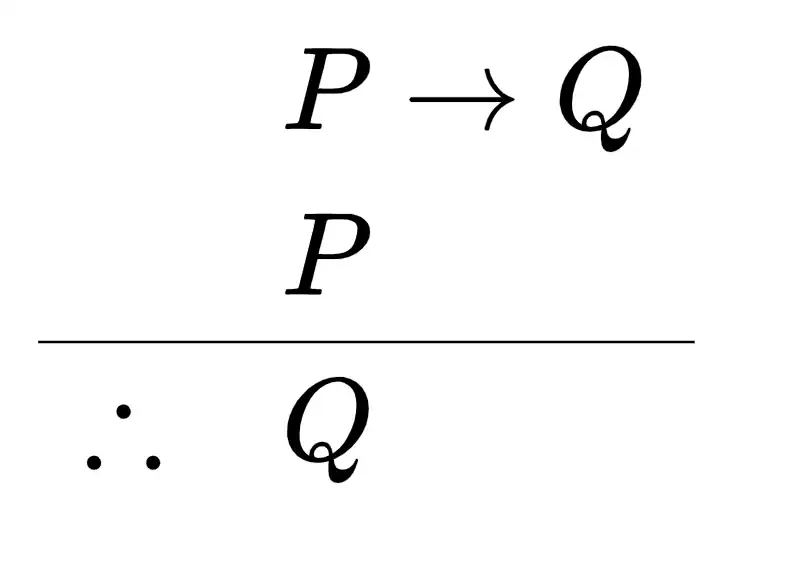 <br>
*Modus Tollens*<br>
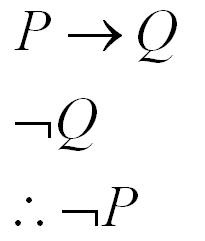


In [100]:
psource(pl_resolution)

In [101]:
kb = PropKB()

For example we can provide for P => Q , P satisfying the implication will give us the conclusion Q

In [102]:
kb.tell(P|'==>'|Q)

In [103]:
kb.tell(P)

In [104]:
kb.ask_if_true(P)
pl_resolution(kb, P)

True

Also for ~Q will give us the conclusion ~P

In [105]:
kb.retract(P)
kb.tell(~Q)

In [106]:
# kb.ask_if_true(~Q)
pl_resolution(kb, ~P)

True

# Tautologi with Entails
Keep in mind that for two symbols P and Q, P => Q is false only when P is True and Q is False. Example usage of tt_entails():

In [107]:
tt_entails(P & Q, Q)

True

P & Q is True only when both P and Q are True. Hence, (P & Q) => Q is True

In [108]:
tt_entails(P | Q, Q)

False

In [109]:
tt_entails(P | Q, P)

False

If we know that P | Q is true, we cannot infer the truth values of P and Q. Hence (P | Q) => Q is False and so is (P | Q) => P.

In [110]:
(A, B, C, D, E, F, G) = symbols('A, B, C, D, E, F, G')
tt_entails(A & (B | C) & D & E & ~(F | G), A & D & E & ~F & ~G)

True

We can see that for the KB to be true, A, D, E have to be True and F and G have to be False. Nothing can be said about B or C.

# Proof By Resolution (Decomposite Of Proposition)

We can handle a verification for certains logic's law
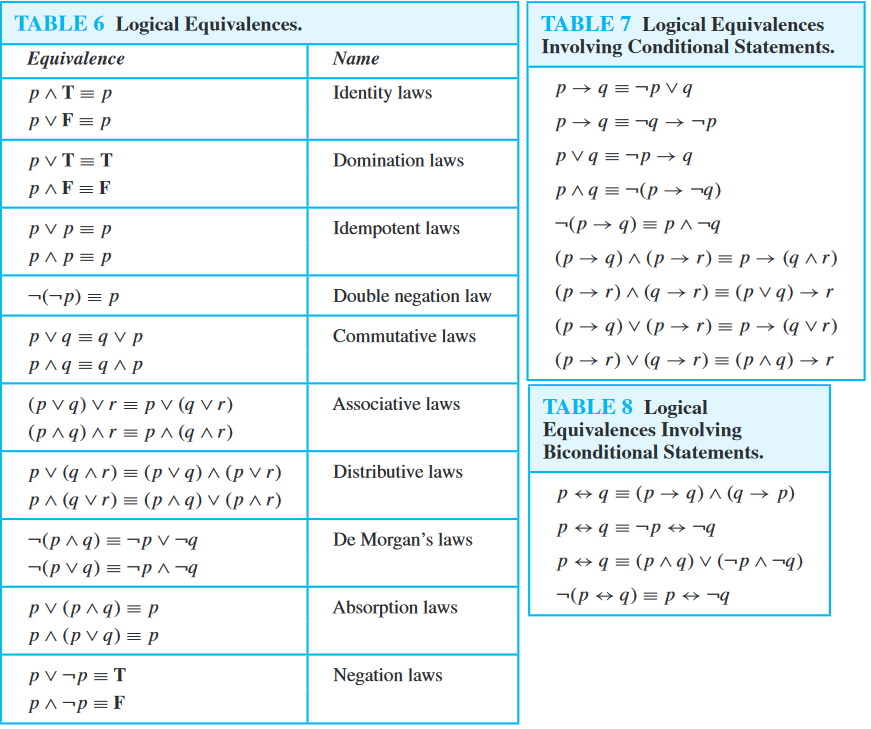

In [111]:
to_cnf(P |'==>'| Q)

(Q | ~P)

In [112]:
to_cnf(P |'<=>'| Q)

((P | ~Q) & (Q | ~P))

In [113]:
to_cnf(~(P |'==>'| Q))

(~Q & P)

In [114]:
to_cnf(P |'^'| Q)

((~P | P) & (Q | P) & (~P | ~Q) & (Q | ~Q))

In [115]:
to_cnf(~(P & Q))

(~P | ~Q)

In [116]:
to_cnf(~(P | Q))

(~P & ~Q)